# Demo Classificazione di elmetti

**Machine Learning 2020/21**

**Daniele Alma 1000024211**

**Pierpaolo Gumina 1000023099**

#1. Impostazione ambiente

Eseguire la seguente cella per scaricare YOLO:

In [ ]:
# Scaricare YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
import torch
from IPython.display import Image, clear_output
clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, 
                                             torch.cuda.get_device_properties(0) 
                                             if torch.cuda.is_available() else 'CPU'))

Per utilizzare il modello YCVR_big (consigliato), eseguire la seguente cella:

In [ ]:
!gdown --id 11is3tQ8AgmLBJmkBWQK7Y1vq-EVoObdB
!mv ./YCVR_big.pt ./model.pt

Per utilizzare il modello YCVR_small, eseguire la seguente cella:

In [ ]:
!gdown --id 1klYSXV717_2cqYZIlxdheJ5llOcoPsyN
!mv ./YCVR_small.pt ./model.pt

Per utilizzare il modello YCR_big, eseguire la seguente cella:

In [ ]:
!gdown --id 1wmcKYOXxPlZQ5HOq0OZgFfM19Vuxd-8t
!mv ./YCR_big.pt ./model.pt

Per utilizzare il modello YCR_small, eseguire la seguente cella:

In [ ]:
!gdown --id 1ex4OZxEtH2kHiM6k6U83A9ZnVBpO-xKN
!mv ./YCR_small.pt ./model.pt

Per utilizzare il modello YCV, eseguire la seguente cella:

In [ ]:
!gdown --id 1WdUsoSQlulQWiZNJ_YiZyaRHkLNrStVq
!mv ./YCV.pt ./model.pt

#2. Esempi

Ecco due esempi di detection:

Downloading...
From: https://drive.google.com/uc?id=1SMsLBwztQmaGgqVivnfRcYZlsY2-HS9c
To: /content/yolov5/im700597.png
100% 875k/875k [00:00<00:00, 56.2MB/s]
detect: weights=['./model.pt'], source=./im700597.png, imgsz=1280, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-218-gc1af67d torch 1.9.0+cu102 CPU

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, cei

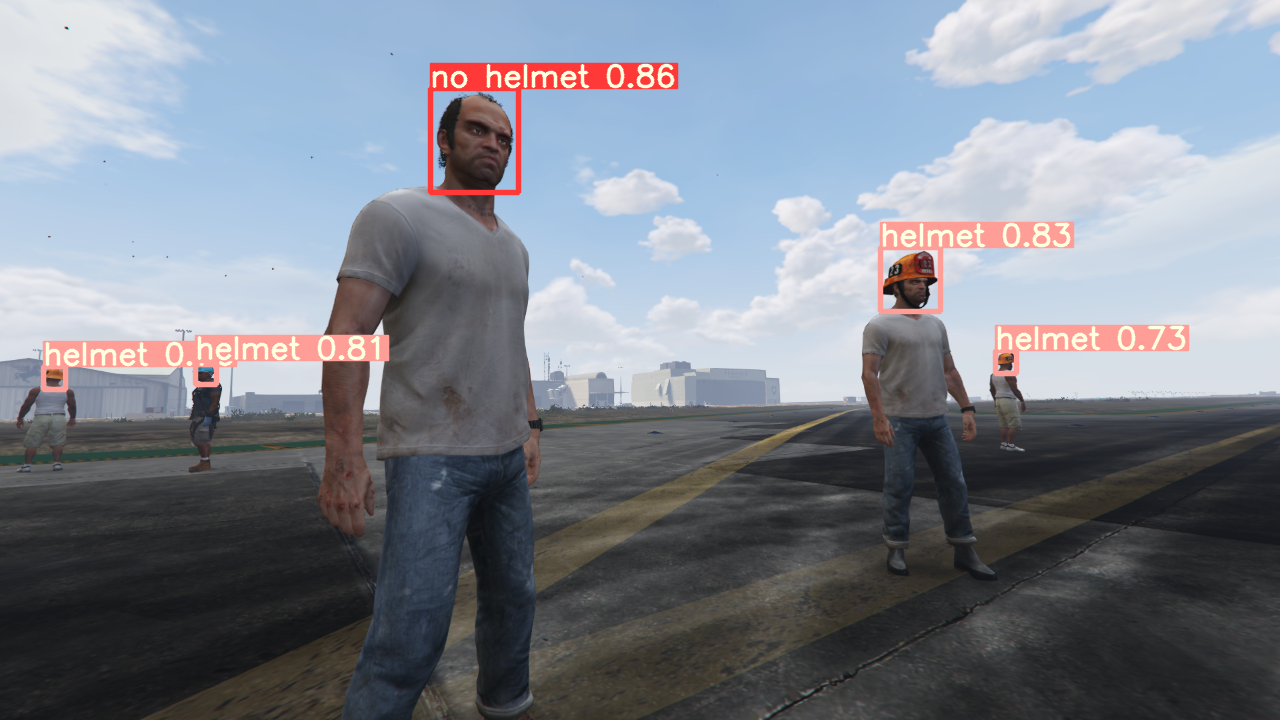

In [ ]:
!gdown --id 1SMsLBwztQmaGgqVivnfRcYZlsY2-HS9c
!rm -rf runs/detect
!python detect.py --weights ./model.pt --img 1280 --conf 0.50 --source ./im700597.png
Image(filename='runs/detect/exp/im700597.png', width=1280)

Downloading...
From: https://drive.google.com/uc?id=1Yyh49pAdwlKauy2KUZpVgGHW-99uhaY_
To: /content/yolov5/part2_000071.jpg
100% 274k/274k [00:00<00:00, 39.6MB/s]
detect: weights=['./model.pt'], source=./part2_000071.jpg, imgsz=1280, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-218-gc1af67d torch 1.9.0+cu102 CPU

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilat

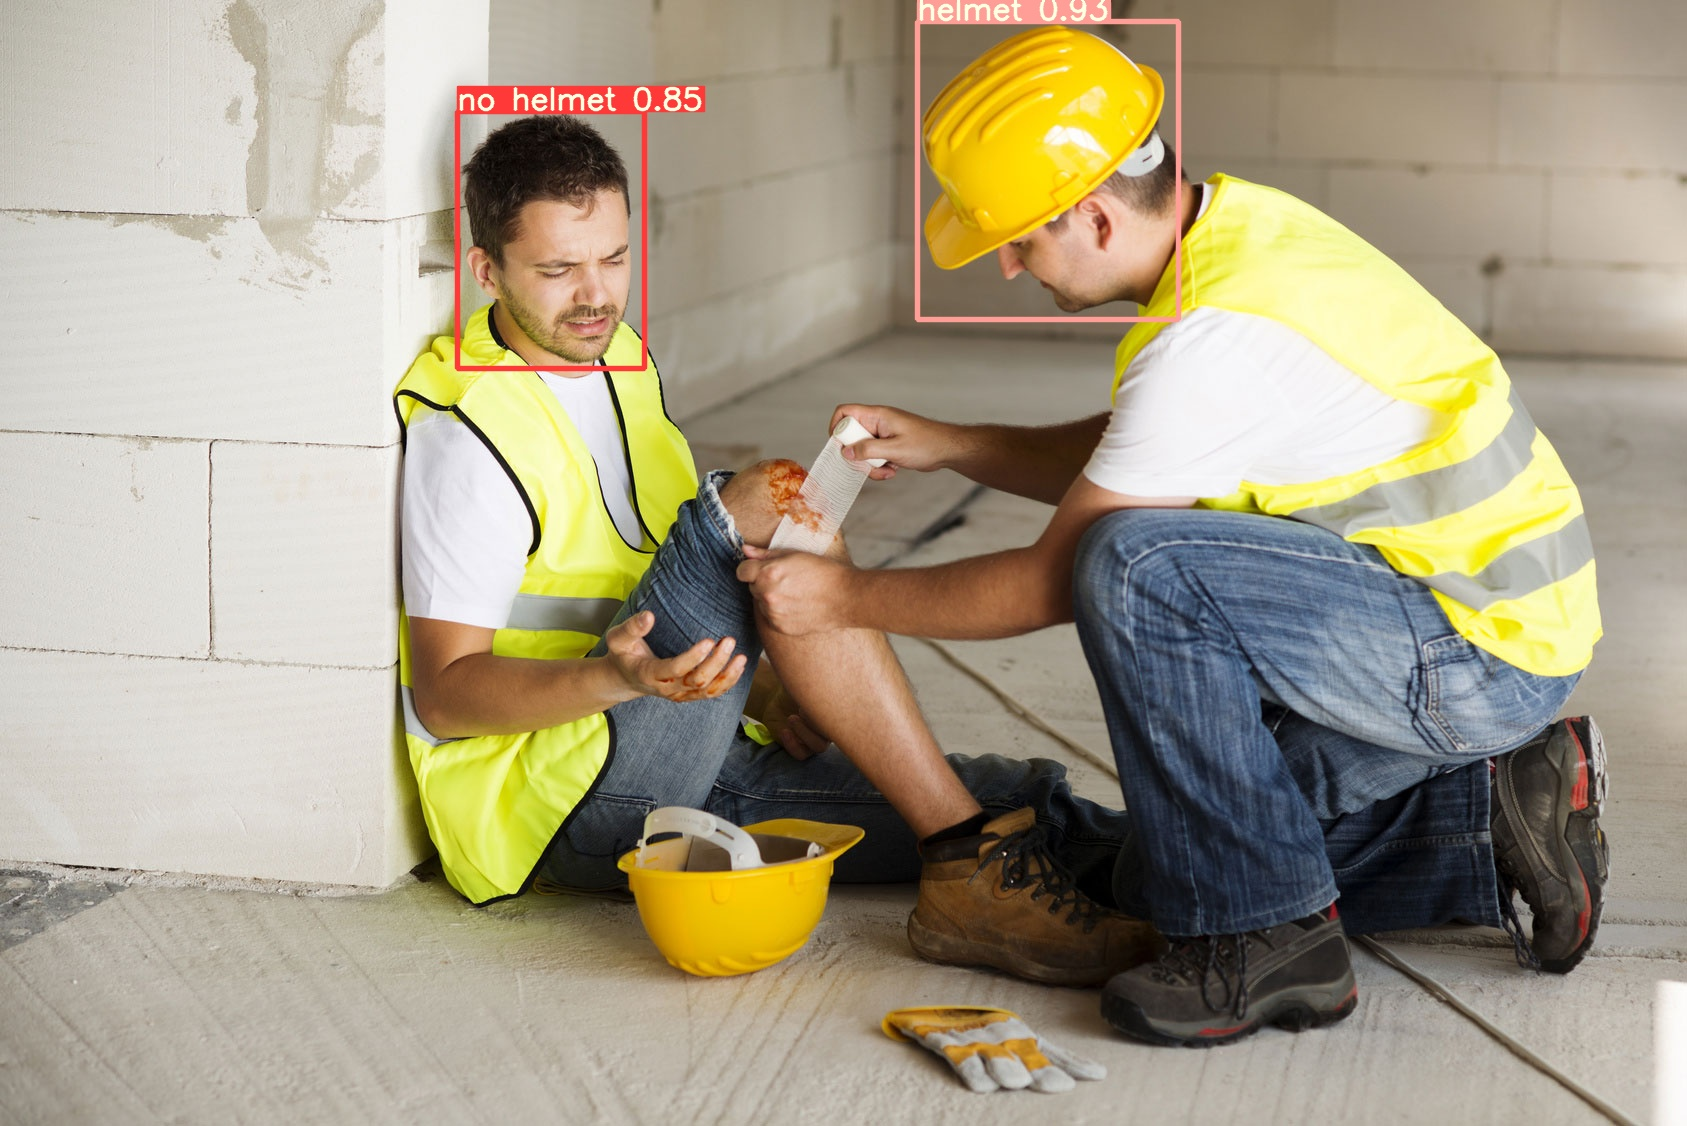

In [ ]:
!gdown --id 1Yyh49pAdwlKauy2KUZpVgGHW-99uhaY_
!rm -rf runs/detect
!python detect.py --weights ./model.pt --img 1280 --conf 0.50 --source ./part2_000071.jpg
Image(filename='runs/detect/exp/part2_000071.jpg', width=1280)

#3. Inferenze su immagini

Per fare inferenze su immagini con il modello, eseguire la cella sottostante e caricare una o più immagini premendo "Scegli file" o trascinandole su esso.

In [ ]:
from google.colab import files
from IPython.display import Image, display
import os
uploaded = files.upload()
for fn in uploaded.keys():
  os.system("rm -rf runs/detect")
  os.system("python detect.py --weights ./model.pt --img 1280 --conf 0.50 --source " + fn)
  display(Image(filename='runs/detect/exp/' + fn))

#4. Inferenze su video

Attualmente è presente un bug su YOLOv5 per cui i video di output vengono salvati con un framerate molto alto: questo potrebbe essere già risolto al momento dell'esecuzione.

Inoltre, ci potrebbero essere problemi di riproduzione del video con il runtime GPU di Colab e la codifica per la compressione è più lenta, quindi è consigliato il runtime CPU.

Per fare inferenze su video locali, eseguire la cella sottostante e caricare uno o più video premendo "Scegli file" o trascinandoli su esso.

In [ ]:
from google.colab import files
from IPython.display import Image, display
import os
from IPython.display import HTML, clear_output
from base64 import b64encode
os.system("rm -rf runs/detect")
os.system("rm -rf output_videos")
os.system("mkdir output_videos")
uploaded = files.upload()
video_file = ''
i = 1
for fn in uploaded.keys():
  print("Effettuando le inferenze su " + fn + "...")
  os.system("python detect.py --weights ./model.pt --conf 0.50 --img 400 --source " + fn)
  print("Fatto! Comprimendo il video...")
  
  # Compress video
  if i == 1:
    video_file = './runs/detect/exp/' + fn
  else:
    video_file = './runs/detect/exp' + str(i) + '/' + fn
  compressed_path = './output_videos/result_' + str(i) + 'compressed.mp4'
  os.system(f"ffmpeg -i {video_file} -vcodec libx264 {compressed_path}")

  # Show video
  mp4 = open(compressed_path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  display(HTML("""
  <video width=400 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))
  i = i + 1

Per fare inferenze su video di YouTube, eseguire la cella sottostante e inserire il link del video quando richiesto.

Il link deve essere in questo formato: https://www.youtube.com/watch?v=xxx

Un video di esempio può essere: https://www.youtube.com/watch?v=VW4aQxGjPQ0

In [ ]:
import os
from IPython.display import HTML, clear_output
from base64 import b64encode
video_link = input('Inserisci il link del video di YouTube: ')
print("Effettuando le inferenze...")
os.system("rm -rf runs/detect")
os.system("rm ./result_compressed.mp4")
os.system("python detect.py --weights ./model.pt --img 400 --conf 0.50 --source " + video_link)
video_file = './runs/detect/exp/' + 'watch_v_' + video_link.split('?v=')[1] + '.mp4'

print("Fatto! Comprimendo il video...")
# Compress video
compressed_path = './result_compressed.mp4'
os.system(f"ffmpeg -i {video_file} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
display(HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url))